In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Creating a dataset using the uniform distribution and adding noise to the first dataset to create the second. The rest of the code can be used when the data points are given as tuples.

In [2]:
size = 100
epsilon = 1
x1 = size*stats.uniform.rvs(size = size)
x2 = x1 + (size/100)*stats.uniform.rvs(size = size)
y1 = size*stats.uniform.rvs(size = size)
y2 = y1 + (size/100)*stats.uniform.rvs(size = size)

Creating tuples from the x and y values for the two sets.

In [3]:
set1 = list()
set2 = list()
for (x, y) in zip(x1, y1):
  set1.append((x,y))
for (x, y) in zip(x2, y2):
  set2.append((x,y))

Sorting the two sets by x to find the corresponding closest points. 

In [4]:
set1.sort()

In [5]:
set2.sort()

Plotting the points

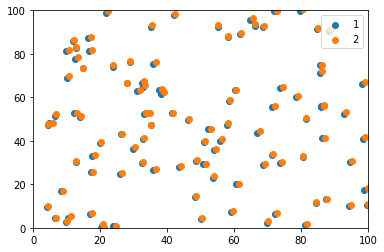

In [6]:
plt.scatter(*zip(*set1))
plt.scatter(*zip(*set2))
plt.xlim([0,size])
plt.ylim([0,size])
plt.legend(['1', '2'])

We calculate certain parameters and check it with a given threshold. If it is lesser then we conclude that the points are highly similar. We can choose any of the below methods and a threshold value to suit our purpose.

1. Calculate distance between closest points and use the mean or median as a measure. Median is a more robust form.

In [7]:
x1 = np.array(list(zip(*set1))[0])
x2 = np.array(list(zip(*set2))[0])
y1 = np.array(list(zip(*set1))[1])
y2 = np.array(list(zip(*set2))[1])

In [8]:
def dist(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [9]:
d = dist(x1,y1,x2,y2)

In [10]:
np.mean(d)

6.696801740341289

In [11]:
np.mean(d) < epsilon

False

In [12]:
np.median(d)

0.8845932163995147

In [13]:
np.median(d) < epsilon

True

2. Calculate correlation between the points and check if they are similar for the two datasets.

In [14]:
np.corrcoef(x1, y1)

array([[1.        , 0.01425674],
       [0.01425674, 1.        ]])

In [15]:
np.corrcoef(x2, y2)

array([[1.        , 0.01523415],
       [0.01523415, 1.        ]])

In [16]:
abs(np.corrcoef(x1, y1)[0][1] - np.corrcoef(x2, y2)[0][1])

0.0009774100185813862

In [17]:
abs(np.corrcoef(x1, y1)[0][1] - np.corrcoef(x2, y2)[0][1]) < epsilon

True

3. Absolute difference of y values

In [18]:
np.mean(abs(y1 - y2))

6.471749938018278

In [19]:
np.mean(abs(y1 - y2)) < epsilon

False

In [20]:
np.median(abs(y1 - y2))

0.6205580805990867

In [21]:
np.median(abs(y1 - y2)) < epsilon

True

4. Squared y values

In [22]:
np.mean(abs((y1 - y2)**2))

267.4000568736107

In [23]:
np.mean(abs((y1 - y2)**2)) < epsilon

False

In [24]:
np.median(abs((y1 - y2)**2))

0.3851099844633724

In [25]:
np.median(abs((y1 - y2)**2)) < epsilon

True

We can see that mean clearly fails in most cases. This is due to the presence of outliers. Thus, median is a better measure.

5. Kolmogorov–Smirnov test

In [26]:
stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.05, pvalue=0.9996892272702655)

In [27]:
stats.ks_2samp(y1, y2)

Ks_2sampResult(statistic=0.04, pvalue=0.999998821968263)

High p value implies that the points are highly similar.